# Intro

House Flippers LLC makes money travelling the country flipping homes. They are going to Ames, Iowa, due to the large housing market in the area with multiple houses to work on. 
They want to know which features will add the most value to the houses they flip so they know what to invest time and money in as they work on the houses. They need a breakdown of possible improvements to a house without adding square-footage, and what is the value each improvement adds so they can decide which features will give the best return on investment.  


Data will be cleaned with all features as possible targets for recommendations as investments, as well as because we would like to see which features affect the house value the most overall.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, median_absolute_error
import os
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [3]:
# use absolute path to retrieve datasets

train = pd.read_csv(os.path.abspath('./datasets/train.csv'))
# sample = pd.read_csv(os.path.abspath('./datasets/sample_sub_reg.csv'))

[source for absolute path](https://stackoverflow.com/questions/51520/how-to-get-an-absolute-file-path-in-python)

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# normalize head columns
train.columns= train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '_')

In [6]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [8]:
# drop pid column because it isn't necessary

train.drop(columns = 'pid', inplace = True)

In [9]:
def find_outliers(num_list):
    mean = num_list.mean()
    std = num_list.std()
    pos_outlier = mean + (std * 3)
    neg_outlier = mean - (std *3)
    return [row for row in num_list if row > pos_outlier or row < neg_outlier]

find_outliers(train['gr_liv_area'])

[3390,
 3228,
 3078,
 3820,
 3279,
 3395,
 5642,
 3222,
 3608,
 3238,
 3082,
 3086,
 3500,
 3140,
 5095,
 3672,
 3493]

In [10]:
# dropping houses bigger than 4,000 sqft according to readme

train[train['gr_liv_area'] > 3999]['gr_liv_area']

960     5642
1885    5095
Name: gr_liv_area, dtype: int64

In [11]:
train = train.drop([960, 1885])

<AxesSubplot:>

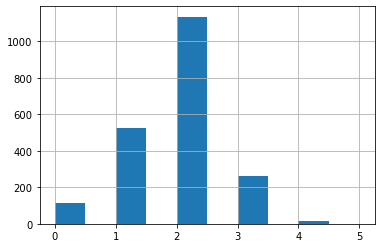

In [12]:
train['garage_cars'].hist()

<AxesSubplot:>

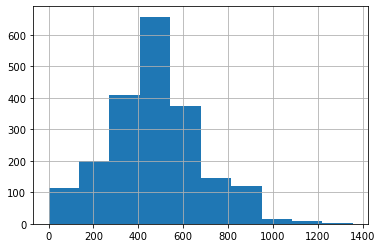

In [13]:
train['garage_area'].hist()

In [14]:
#dropping pool and alley columns because they don't apply to most of the dataset

train.drop(columns = ['pool_qc',
                      'pool_area',#not applicable to most houses
                      'alley', #not applicable to most houses
                      'fence', #not applicable to most houses
                      'misc_feature', #not applicable to most houses
                      'misc_val', #not applicable to most houses
                     'garage_cond', #the same as another column: exter qual
                     'exter_cond', #the same as another column: garage area
                     'garage_area'], #the same as another column: garage cars
           inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


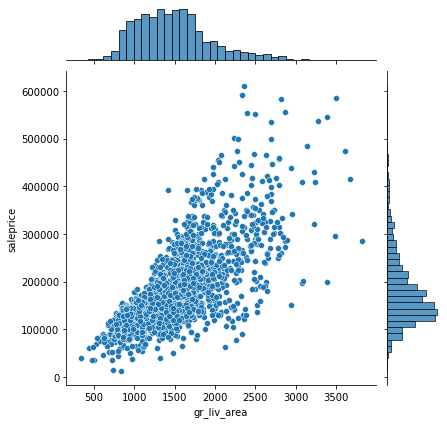

In [15]:
#checking for huge outliers in sale and swft

sns.jointplot(train['gr_liv_area'], train['saleprice']);

**Interpretation**
It would be good to scale these logarithmically because of the skewed distribution of these features

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2049 non-null   int64  
 1   ms_subclass      2049 non-null   int64  
 2   ms_zoning        2049 non-null   object 
 3   lot_frontage     1719 non-null   float64
 4   lot_area         2049 non-null   int64  
 5   street           2049 non-null   object 
 6   lot_shape        2049 non-null   object 
 7   land_contour     2049 non-null   object 
 8   utilities        2049 non-null   object 
 9   lot_config       2049 non-null   object 
 10  land_slope       2049 non-null   object 
 11  neighborhood     2049 non-null   object 
 12  condition_1      2049 non-null   object 
 13  condition_2      2049 non-null   object 
 14  bldg_type        2049 non-null   object 
 15  house_style      2049 non-null   object 
 16  overall_qual     2049 non-null   int64  
 17  overall_cond  

In [17]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2049.0,1473.676428,844.248064,1.0,753.0,1481.0,2199.00,2930.0
ms_subclass,2049.0,57.025378,42.837269,20.0,20.0,50.0,70.00,190.0
lot_frontage,1719.0,68.878999,22.472112,21.0,58.0,68.0,80.00,313.0
lot_area,2049.0,10024.677892,6608.511749,1300.0,7500.0,9405.0,11500.00,159000.0
overall_qual,2049.0,6.108346,1.421780,1.0,5.0,6.0,7.00,10.0
overall_cond,2049.0,5.562714,1.104897,1.0,5.0,5.0,6.00,9.0
year_built,2049.0,1971.673499,30.171293,1872.0,1953.0,1974.0,2001.00,2010.0
year_remod/add,2049.0,1984.166423,21.032785,1950.0,1964.0,1993.0,2004.00,2010.0
mas_vnr_area,2027.0,98.797731,172.563846,0.0,0.0,0.0,160.00,1600.0
bsmtfin_sf_1,2048.0,438.018555,439.843609,0.0,0.0,368.0,733.00,2188.0


In [18]:
# checking the number of cells beyond the year the data stops at 
train[train['garage_yr_blt'] > 2010]['garage_yr_blt']

1699    2207.0
Name: garage_yr_blt, dtype: float64

In [19]:
#replacing the year 
train['garage_yr_blt'].replace(to_replace = 2207, value = 2007, inplace = True)

In [20]:
# checking values
train['garage_yr_blt'].describe()

count    1935.000000
mean     1978.574160
std        24.909423
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: garage_yr_blt, dtype: float64

In [21]:
# looking at deck size outlier 

train[train['wood_deck_sf'] > 1000.0][['wood_deck_sf', 'gr_liv_area']]

,wood_deck_sf,gr_liv_area
966,1424,1356


In [22]:
# what are the next biggest decks and house size 

find_outliers(train['wood_deck_sf'])
# train[train['wood_deck_sf'] > train['wood_deck_sf'].quantile(.99)][['wood_deck_sf', 'gr_liv_area', 'saleprice', 'lot_area']].sort_values('wood_deck_sf')

[483,
 736,
 496,
 646,
 521,
 530,
 641,
 503,
 519,
 495,
 1424,
 500,
 728,
 536,
 586,
 576,
 550,
 517,
 857,
 520,
 635,
 870,
 657,
 483,
 684,
 668,
 631,
 509]

As you can see, the largest outlier is almost 2 times the size as the next biggest outlier. Therefore, I think it is am error and will treat it as a null to fill with the mean. 

In [23]:
# looking at type to make sure it isn't one condo in a residential area

train.iloc[[966]]['ms_subclass']

967    20
Name: ms_subclass, dtype: int64

Subclass 20 is a ``1-STORY 1946 & NEWER ALL STYLEs`` which means this house is a 1356 sf single unit home with a deck that is larger than it is. I will replace it with the mean of the top quantile homes becasue there are other homes with a higher ratio of square feet to deck size. 

In [24]:
#finding the best mean to replace it with
print(train[train['wood_deck_sf'] >
            train['wood_deck_sf'].quantile(.99)][['wood_deck_sf',
                                                  'gr_liv_area']].mean())
print(train[train['wood_deck_sf'] > 
            train['wood_deck_sf'].quantile(.50)][['wood_deck_sf',
                                                  'gr_liv_area']].mean())

wood_deck_sf     668.190476
gr_liv_area     2178.857143
dtype: float64
wood_deck_sf     196.810062
gr_liv_area     1601.771047
dtype: float64


In [25]:
# replacing the value
train['wood_deck_sf'].replace(to_replace = 1424, value = 668, inplace = True)

In [26]:
# confirming outliers
train['wood_deck_sf'].describe()

count    2049.000000
mean       93.185456
std       125.422570
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       870.000000
Name: wood_deck_sf, dtype: float64

In [27]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2049.0,1473.676428,844.248064,1.0,753.0,1481.0,2199.00,2930.0
ms_subclass,2049.0,57.025378,42.837269,20.0,20.0,50.0,70.00,190.0
lot_frontage,1719.0,68.878999,22.472112,21.0,58.0,68.0,80.00,313.0
lot_area,2049.0,10024.677892,6608.511749,1300.0,7500.0,9405.0,11500.00,159000.0
overall_qual,2049.0,6.108346,1.421780,1.0,5.0,6.0,7.00,10.0
overall_cond,2049.0,5.562714,1.104897,1.0,5.0,5.0,6.00,9.0
year_built,2049.0,1971.673499,30.171293,1872.0,1953.0,1974.0,2001.00,2010.0
year_remod/add,2049.0,1984.166423,21.032785,1950.0,1964.0,1993.0,2004.00,2010.0
mas_vnr_area,2027.0,98.797731,172.563846,0.0,0.0,0.0,160.00,1600.0
bsmtfin_sf_1,2048.0,438.018555,439.843609,0.0,0.0,368.0,733.00,2188.0


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2049 non-null   int64  
 1   ms_subclass      2049 non-null   int64  
 2   ms_zoning        2049 non-null   object 
 3   lot_frontage     1719 non-null   float64
 4   lot_area         2049 non-null   int64  
 5   street           2049 non-null   object 
 6   lot_shape        2049 non-null   object 
 7   land_contour     2049 non-null   object 
 8   utilities        2049 non-null   object 
 9   lot_config       2049 non-null   object 
 10  land_slope       2049 non-null   object 
 11  neighborhood     2049 non-null   object 
 12  condition_1      2049 non-null   object 
 13  condition_2      2049 non-null   object 
 14  bldg_type        2049 non-null   object 
 15  house_style      2049 non-null   object 
 16  overall_qual     2049 non-null   int64  
 17  overall_cond  

# Checking Houses with 0 bed/bath/Sf

In [29]:
train[['bedroom_abvgr', 'gr_liv_area', 'full_bath']].describe()

,bedroom_abvgr,gr_liv_area,full_bath
count,2049.000000,2049.000000,2049.000000
mean,2.843826,1495.553441,1.576867
std,0.826804,485.783577,0.549389
min,0.000000,334.000000,0.000000
25%,2.000000,1128.000000,1.000000
50%,3.000000,1444.000000,2.000000
75%,3.000000,1728.000000,2.000000
max,8.000000,3820.000000,4.000000


In [30]:
# Are there houses without any bedrooms, bathrooms?

train[(train['bedroom_abvgr'] == 0) & (train['full_bath'] == 0)]['gr_liv_area']

191     1743
346      960
744     1258
1571    1842
Name: gr_liv_area, dtype: int64

In [31]:
# are there any houses that are just land?

train[(train['bedroom_abvgr'] == 0) & (train['full_bath'] == 0) & (train['half_bath'] == 0)]['totrms_abvgrd']

346    3
Name: totrms_abvgrd, dtype: int64

In [32]:
# looking at potential patterns in houses without bedrooms
train[train['bedroom_abvgr'] == 0][['ms_subclass', 
                                    'full_bath', 
                                    'bsmt_full_bath',
                                    'gr_liv_area',
                                    'totrms_abvgrd']]

,ms_subclass,full_bath,bsmt_full_bath,gr_liv_area,totrms_abvgrd
191,20,0,2.0,1743,5
346,80,0,1.0,960,3
744,90,0,2.0,1258,6
1308,120,1,1.0,1593,5
1571,20,0,2.0,1842,5


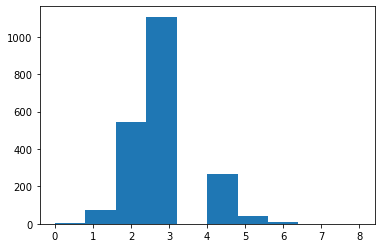

In [33]:
hist_1 = plt.hist(train['bedroom_abvgr']);

In [34]:
#  looking at good values to use as fillers

train[(train['bedroom_abvgr'] != 0) & (train['full_bath'] != 0)].groupby([
    'ms_subclass', 'bsmt_full_bath'])[[
    'bedroom_abvgr']].mean()

#https://towardsdatascience.com/using-pandas-transform-and-apply-to-deal-with-missing-data-on-a-group-level-cb6ccf060531

bedroom_abvgr
ms_subclass bsmt_full_bath               
20          0.0                  2.752000
            1.0                  2.645995
            2.0                  2.500000
30          0.0                  2.060976
            1.0                  2.000000
40          0.0                  2.500000
            1.0                  1.500000
45          0.0                  2.222222
            1.0                  2.000000
50          0.0                  3.079268
            1.0                  3.117647
60          0.0                  3.373984
            1.0                  3.346939
70          0.0                  3.219178
            1.0                  3.375000
            2.0                  3.000000
75          0.0                  3.400000
            1.0                  5.000000
80          0.0                  3.113636
            1.0                  2.923077
            2.0                  3.000000
85          0.0                  2.857143
            1.0                  2.285714
90          0.0                  3.925926
            1.0                  3.571429
            2.0                  3.400000
            3.0                  3.000000
120         0.0                  1.906977
            1.0                  1.729412
            2.0                  1.500000
150         1.0                  2.000000
160         0.0                  2.661765
            1.0                  2.500000
180         1.0                  1.636364
190         0.0                  3.941176
            1.0                  2.785714
            2.0                  5.000000

In [35]:
train.corr()['bedroom_abvgr'].sort_values()

bsmt_full_bath    -0.159001
bsmtfin_sf_1      -0.123762
bsmtfin_sf_2      -0.043425
year_built        -0.041701
3ssn_porch        -0.033853
garage_yr_blt     -0.033713
year_remod/add    -0.019283
yr_sold           -0.012006
overall_cond      -0.010119
ms_subclass       -0.003955
id                 0.011025
bsmt_half_bath     0.014693
screen_porch       0.019495
enclosed_porch     0.032887
wood_deck_sf       0.036804
overall_qual       0.054692
total_bsmt_sf      0.055448
open_porch_sf      0.057156
mas_vnr_area       0.058298
mo_sold            0.069254
low_qual_fin_sf    0.073441
fireplaces         0.080342
garage_cars        0.086767
1st_flr_sf         0.099310
saleprice          0.137145
lot_area           0.143438
bsmt_unf_sf        0.191544
kitchen_abvgr      0.227188
lot_frontage       0.228577
half_bath          0.231716
full_bath          0.344626
2nd_flr_sf         0.503342
gr_liv_area        0.526196
totrms_abvgrd      0.665009
bedroom_abvgr      1.000000
Name: bedroom_abvgr,

You can see that the total rooms correlates highly to the total rooms above ground, so I will use that mean to fill the `0` and `NaN` values

In [36]:
train['bedroom_abvgr'].value_counts()

3    1107
2     543
4     265
1      75
5      41
6      12
0       5
8       1
Name: bedroom_abvgr, dtype: int64

In [37]:
# filling 0 bedroom houses with bedrooms

#first change 0 to null to be able to fillna()

train['bedroom_abvgr'].replace({0: None}, inplace = True)


In [38]:
train[['bedroom_abvgr']].isna().sum()

bedroom_abvgr    5
dtype: int64

In [39]:
# # transforming with just rooms above ground 
train['bedroom_abvgr'] = train.groupby(['totrms_abvgrd'])['bedroom_abvgr'].transform(
    lambda grp: grp.fillna(np.mean(grp)))

# https://stackoverflow.com/questions/51189962/how-to-replace-0-values-with-mean-based-on-groupby

In [40]:
train['bedroom_abvgr'].isna().sum()

0

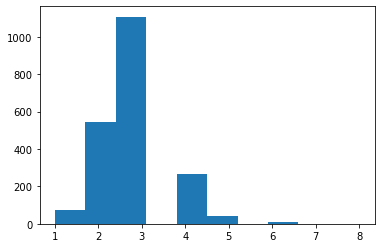

In [41]:
# making sure the distribution didn't change

plt.hist(train['bedroom_abvgr']);

In [42]:
#checking work

train['bedroom_abvgr'].describe()

count    2049.000000
mean        2.849198
std         0.815870
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: bedroom_abvgr, dtype: float64

# Checking houses with no full bathrooms at all

In [43]:
# checking houses with no full bathrooms at all

train[
    (train['bsmt_full_bath'] == 0) &
    (train['full_bath'] == 0)][['ms_subclass',
    'gr_liv_area', 'bedroom_abvgr', 'half_bath', 'bsmt_full_bath']]

,ms_subclass,gr_liv_area,bedroom_abvgr,half_bath,bsmt_full_bath
1280,120,1402,2.0,2,0.0


In [44]:
# what is the distribution among groups

train[train['ms_subclass'] == 120].groupby(['bedroom_abvgr', 'full_bath', 
                                            'half_bath'])[['full_bath']].mean()

full_bath
bedroom_abvgr full_bath half_bath           
1.000000      1         0                  1
                        1                  1
              2         0                  2
2.000000      0         2                  0
              1         0                  1
                        1                  1
              2         0                  2
                        1                  2
2.386139      1         1                  1
3.000000      1         0                  1
                        1                  1

Because the null 0 bathroom house are in class 120 and the majority of houses in that group with the same number of bedrooms and half baths, I am filling it with 1.

In [45]:
train.iloc[1280, train.columns.get_loc('full_bath')] = 1

# Dealing with Nulls

In [46]:
# making a list of columns to use as reference when grouped columns

def get_column_names(df, word):
    return [col for col in df.columns if word.lower() in col.lower()]

bsmt_cols = get_column_names(train, 'bsmt')
gar_cols = get_column_names(train, 'garage')

In [47]:
# columns related to deck or porches
deck_porch_cols = [col for col in train.columns # garage and porch columns
                  if ('porch' in col) | ('deck' in col)]

In [48]:
# checking if any values have no info about the house

null_df = train[train.isnull().sum(axis=1) == len(train.columns)] 
null_df.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,mo_sold,yr_sold,sale_type,saleprice


In [49]:
# checking if any houses have total nulls for important factors

train[train[['gr_liv_area',
             'bedroom_abvgr',
             'full_bath',
             'half_bath']].isnull().sum(axis = 1) > 1]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,mo_sold,yr_sold,sale_type,saleprice


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2049 non-null   int64  
 1   ms_subclass      2049 non-null   int64  
 2   ms_zoning        2049 non-null   object 
 3   lot_frontage     1719 non-null   float64
 4   lot_area         2049 non-null   int64  
 5   street           2049 non-null   object 
 6   lot_shape        2049 non-null   object 
 7   land_contour     2049 non-null   object 
 8   utilities        2049 non-null   object 
 9   lot_config       2049 non-null   object 
 10  land_slope       2049 non-null   object 
 11  neighborhood     2049 non-null   object 
 12  condition_1      2049 non-null   object 
 13  condition_2      2049 non-null   object 
 14  bldg_type        2049 non-null   object 
 15  house_style      2049 non-null   object 
 16  overall_qual     2049 non-null   int64  
 17  overall_cond  

In [51]:
# checking if basements will null values have anything that needs to be populated 

train[train[bsmt_cols].isnull().sum(axis=1) > 0][bsmt_cols]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
240,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
249,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
256,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
390,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
437,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


It looks like all the nulls are due to those features not being relevent to that house.

In [52]:
# fill nulls in basement columns where it doesn't apply

train[bsmt_cols] = train[bsmt_cols].fillna(0)

In [53]:
train[train['bsmt_qual']!= 0].shape

(1994, 71)

In [54]:
train[bsmt_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bsmt_qual       2049 non-null   object 
 1   bsmt_cond       2049 non-null   object 
 2   bsmt_exposure   2049 non-null   object 
 3   bsmtfin_type_1  2049 non-null   object 
 4   bsmtfin_sf_1    2049 non-null   float64
 5   bsmtfin_type_2  2049 non-null   object 
 6   bsmtfin_sf_2    2049 non-null   float64
 7   bsmt_unf_sf     2049 non-null   float64
 8   total_bsmt_sf   2049 non-null   float64
 9   bsmt_full_bath  2049 non-null   float64
 10  bsmt_half_bath  2049 non-null   float64
dtypes: float64(6), object(5)
memory usage: 192.1+ KB


# Garage Nulls

In [55]:
# check for garage columns where values are missing, but there is a garage

train[train[gar_cols].notnull().sum(axis=1) < 2][gar_cols]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_qual
28,NaN,NaN,NaN,0.0,NaN
53,NaN,NaN,NaN,0.0,NaN
65,NaN,NaN,NaN,0.0,NaN
79,NaN,NaN,NaN,0.0,NaN
101,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...
1991,NaN,NaN,NaN,0.0,NaN
2010,NaN,NaN,NaN,0.0,NaN
2027,NaN,NaN,NaN,0.0,NaN
2039,NaN,NaN,NaN,0.0,NaN


In [56]:
#finding best values to populate row 1712 with

print(train[train['garage_type'] == 'Detchd'][gar_cols].describe())
print(train[train['garage_type'] == 'Detchd'][gar_cols].value_counts())

       garage_yr_blt  garage_cars
count     535.000000   535.000000
mean     1962.261682     1.558879
std        26.906948     0.567364
min      1895.000000     1.000000
25%      1940.000000     1.000000
50%      1964.000000     2.000000
75%      1983.000000     2.000000
max      2009.000000     5.000000
garage_type  garage_yr_blt  garage_finish  garage_cars  garage_qual
Detchd       1940.0         Unf            1.0          TA             11
             1999.0         Unf            2.0          TA             10
             2000.0         Unf            2.0          TA             10
             1939.0         Unf            1.0          TA              9
             1977.0         Unf            2.0          TA              9
                                                                       ..
             1968.0         Fin            2.0          TA              1
                            Unf            2.0          TA              1
                                  

In [57]:
# checking this again
train.loc[1712][gar_cols]

garage_type      Detchd
garage_yr_blt       NaN
garage_finish       NaN
garage_cars         NaN
garage_qual         NaN
Name: 1712, dtype: object

In [58]:
#fixing nulls in the garage with missing values 

train.loc[1712,['garage_yr_blt', 
                'garage_finish', 
                'garage_cars', 
                'garage_qual']] = [1964,
                                   'Unf',
                                   2,
                                   'TA']
train.loc[1712][gar_cols]

garage_type      Detchd
garage_yr_blt      1964
garage_finish       Unf
garage_cars           2
garage_qual          TA
Name: 1712, dtype: object

In [59]:
# filling the other nulls in the garage columns  
train[list(train[gar_cols].columns.values)] = train[
    list(train[gar_cols].columns.values)].fillna(0)

In [60]:
train[gar_cols].isna().sum()

garage_type      0
garage_yr_blt    0
garage_finish    0
garage_cars      0
garage_qual      0
dtype: int64

In [61]:
#checking value counts for the garage columns

train['garage_type'].value_counts(), train[
    'garage_yr_blt'].value_counts(), train[
    'garage_qual'].value_counts()

(Attchd     1211
 Detchd      536
 BuiltIn     132
 0           113
 Basment      27
 2Types       19
 CarPort      11
 Name: garage_type, dtype: int64,
 0.0       113
 2005.0    105
 2007.0     85
 2006.0     80
 2004.0     72
          ... 
 1895.0      1
 1896.0      1
 1933.0      1
 1919.0      1
 1917.0      1
 Name: garage_yr_blt, Length: 100, dtype: int64,
 TA    1831
 0      113
 Fa      82
 Gd      18
 Ex       3
 Po       2
 Name: garage_qual, dtype: int64)

In [62]:
train[gar_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   garage_type    2049 non-null   object 
 1   garage_yr_blt  2049 non-null   float64
 2   garage_finish  2049 non-null   object 
 3   garage_cars    2049 non-null   float64
 4   garage_qual    2049 non-null   object 
dtypes: float64(2), object(3)
memory usage: 176.0+ KB


In [63]:
# checking the that types are correct

train.dtypes[train.dtypes == 'object']

ms_zoning         object
street            object
lot_shape         object
land_contour      object
utilities         object
lot_config        object
land_slope        object
neighborhood      object
condition_1       object
condition_2       object
bldg_type         object
house_style       object
roof_style        object
roof_matl         object
exterior_1st      object
exterior_2nd      object
mas_vnr_type      object
exter_qual        object
foundation        object
bsmt_qual         object
bsmt_cond         object
bsmt_exposure     object
bsmtfin_type_1    object
bsmtfin_type_2    object
heating           object
heating_qc        object
central_air       object
electrical        object
kitchen_qual      object
functional        object
fireplace_qu      object
garage_type       object
garage_finish     object
garage_qual       object
paved_drive       object
sale_type         object
dtype: object

# Fireplace nulls

In [64]:
# checking if all nulls in fireplace quality don't have fireplaces 

train[(train['fireplaces'] > 0) & 
      (train['fireplace_qu'].isnull())][[
    'fireplaces',
    'fireplace_qu']]

,fireplaces,fireplace_qu


In [65]:
# updating nulls in fireplaces

train['fireplaces'].fillna(0, inplace = True)
train['fireplace_qu'].fillna(0, inplace = True)

In [66]:
train[['fireplaces', 'fireplace_qu']].isna().sum()

fireplaces      0
fireplace_qu    0
dtype: int64

In [67]:
train['fireplaces'].value_counts(), train['fireplace_qu'].value_counts()

(0    1000
 1     898
 2     145
 3       5
 4       1
 Name: fireplaces, dtype: int64,
 0     1000
 Gd     521
 TA     407
 Fa      59
 Po      31
 Ex      31
 Name: fireplace_qu, dtype: int64)

# Lot frontage nulls

In [68]:
train['lot_frontage'].isna().sum()

330

In [69]:
train['lot_frontage'].describe()

count    1719.000000
mean       68.878999
std        22.472112
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [70]:
train.corr()['lot_frontage'].sort_values()

ms_subclass       -0.402847
overall_cond      -0.052405
bsmt_half_bath    -0.036668
id                -0.027318
mo_sold           -0.008146
enclosed_porch    -0.000414
low_qual_fin_sf    0.000560
2nd_flr_sf         0.005879
yr_sold            0.009275
kitchen_abvgr      0.018032
half_bath          0.026929
3ssn_porch         0.033768
bsmtfin_sf_2       0.040064
year_remod/add     0.079428
screen_porch       0.079737
garage_yr_blt      0.092270
bsmt_full_bath     0.092744
year_built         0.104249
wood_deck_sf       0.107749
bsmt_unf_sf        0.131057
bsmtfin_sf_1       0.146586
full_bath          0.153287
open_porch_sf      0.161155
overall_qual       0.181575
mas_vnr_area       0.194072
bedroom_abvgr      0.235336
fireplaces         0.235470
total_bsmt_sf      0.301681
garage_cars        0.303315
gr_liv_area        0.346306
totrms_abvgrd      0.349018
saleprice          0.355530
1st_flr_sf         0.432153
lot_area           0.541488
lot_frontage       1.000000
Name: lot_frontage, 

In [71]:
# train['lot_frontage'] = train.groupby(['ms_zoning',
#                                  'lot_area'])[
#     'lot_frontage'].transform(lambda x: x.fillna(x.mean()))

In [72]:
train['lot_frontage'].isna().sum()

330

In [73]:
print(train['lot_frontage'].dtype)

float64


In [74]:
train['lot_frontage'] = train.groupby(['ms_subclass'])[
    'lot_frontage'].transform(lambda grp: grp.fillna(np.mean(grp)))

In [75]:
train['lot_frontage'].fillna(0, inplace = True)

In [76]:
train[train['lot_frontage'].isna()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,mo_sold,yr_sold,sale_type,saleprice


In [77]:
# are there any wild outliers? 
find_outliers(train['lot_frontage'])

[137.0,
 134.0,
 140.0,
 155.0,
 195.0,
 141.0,
 160.0,
 174.0,
 313.0,
 140.0,
 144.0,
 0.0,
 138.0,
 134.0,
 134.0,
 200.0,
 150.0,
 153.0,
 135.0]

# Filling Empty Veneer Types

In [78]:
train['mas_vnr_type'].isna().sum()

22

In [79]:
# giving up and filling with 0

train['mas_vnr_type'].fillna(0, inplace = True)
train['mas_vnr_area'].fillna(0, inplace = True)

In [80]:
train[['mas_vnr_type', 'mas_vnr_area']].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mas_vnr_type  2049 non-null   object 
 1   mas_vnr_area  2049 non-null   float64
dtypes: float64(1), object(1)
memory usage: 128.0+ KB


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2049 non-null   int64  
 1   ms_subclass      2049 non-null   int64  
 2   ms_zoning        2049 non-null   object 
 3   lot_frontage     2049 non-null   float64
 4   lot_area         2049 non-null   int64  
 5   street           2049 non-null   object 
 6   lot_shape        2049 non-null   object 
 7   land_contour     2049 non-null   object 
 8   utilities        2049 non-null   object 
 9   lot_config       2049 non-null   object 
 10  land_slope       2049 non-null   object 
 11  neighborhood     2049 non-null   object 
 12  condition_1      2049 non-null   object 
 13  condition_2      2049 non-null   object 
 14  bldg_type        2049 non-null   object 
 15  house_style      2049 non-null   object 
 16  overall_qual     2049 non-null   int64  
 17  overall_cond  

# Ranking Values Numerically

In [82]:
# changing ordinal to ranked scale 

# Scale mapper starts at -1 because of the effect poor quality has on homes compared to having no basement. 

scale_mapper = {"Ex": 3,
       "Gd" : 2,
       "TA":1,
       "Fa":0 ,
       'Po':-1} #fillna(0)


# Kitchen
train['kitchen_qual'].replace(scale_mapper, inplace = True)

# Basment quality
train['bsmt_qual'].replace(scale_mapper, inplace = True)

#Basement height
train['bsmt_cond'].replace(scale_mapper, inplace = True)

# Heating quality
train['heating_qc'].replace(scale_mapper, inplace = True)

# Garage quality
train['garage_qual'].replace(scale_mapper, inplace = True)

# Exterior quality
train['exter_qual'].replace(scale_mapper, inplace = True)

#misc mappers

# paved driveway
train['paved_drive'].replace({"Y": 3,
       "P" : 2,
       "N":1}, inplace = True)

# mapper for seasons sold
train['mo_sold']= train['mo_sold'].map(
    lambda x: 
    'Winter' if (x == 12) | (x <= 2) else (
        'Spring' if (x >=3) & (x<=5) else (
            'Summer' if (x >=6) & (x <=9) else 'Fall') ))

# land slope
train['land_slope'].replace({
    'Gtl': 3, 'Mod': 2, "Sev": 1}, inplace = True)

# lot shape
train['lot_shape'].replace({
    'Reg': 4, 'IR1': 3, "IR2": 2, 'IR3': 1}, inplace = True)

# land contour
train['land_contour'].replace({'Lvl': 4,
                               'Bnk': 3,
                               "HLS": 2,
                               'Low': 1}, inplace = True)

# house functionality
train['functional'].replace({'Typ': 8, 'Min1':7, 
                             'Min2': 6, 'Mod': 5, 
                             'Maj1': 4,'Maj2': 3, 
                             'Sev': 2, 'Sal': 1}, 
                            inplace = True)
# street pavement
train['street'].replace({'Grvl': 1,
                         'Pave': 2}, inplace = True)

# fireplace quality
train['fireplace_qu'].replace({'Ex': 3,
                               'Gd': 2,
                               "TA": 1,
                               'Fa': 0,
                               'Po':-1}, inplace = True)
# basment exposure 
train['bsmt_exposure'].fillna(0, inplace = True)
train['bsmt_exposure'].replace({'Gd': 4,
       'Av': 3,
       'Mn': 2,
       'No': 1}, inplace = True)

# central air - yes or no?
train['central_air'].replace({'Y': 1, 'N': 0}, inplace = True)

## Other Rankable Features

In [83]:
train['garage_finish'].replace({'Fin': 3,
                               'RFn': 2,
                               'Unf': 1}, inplace = True)

In [84]:
train['garage_finish'].value_counts()

1    850
2    579
3    507
0    113
Name: garage_finish, dtype: int64

In [85]:
#checking if an unfinished garage is worth the same as no garage at all
train.groupby('garage_finish')['saleprice'].mean().sort_values()

garage_finish
0    105669.150442
1    140730.137647
2    204792.036269
3    240068.418146
Name: saleprice, dtype: float64

In [86]:
# Ranking basement finishes

bsmnt_finish_mapper = {'GLQ':5,
       'ALQ':5,
       'BLQ':4,
       'Rec':3,
       'LwQ':2,
       'Unf':1,}

train['bsmtfin_type_1'].replace(bsmnt_finish_mapper, inplace = True)
train['bsmtfin_type_2'].replace(bsmnt_finish_mapper, inplace = True)

In [87]:
# looking at what object dtypes are left

train.dtypes[train.dtypes == 'object']

ms_zoning       object
utilities       object
lot_config      object
neighborhood    object
condition_1     object
condition_2     object
bldg_type       object
house_style     object
roof_style      object
roof_matl       object
exterior_1st    object
exterior_2nd    object
mas_vnr_type    object
foundation      object
heating         object
electrical      object
garage_type     object
mo_sold         object
sale_type       object
dtype: object

In [88]:
train['utilities'].value_counts()

AllPub    2047
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

In [89]:
train['mo_sold'].value_counts()

Summer    931
Spring    633
Winter    260
Fall      225
Name: mo_sold, dtype: int64

In [90]:
util_mapper = {"AllPub": 4,
       "NoSewr" : 3,
       "NoSeWa":2,
              'ELO': 1}

train['utilities'].replace( {"AllPub": 4,
       "NoSewr" : 3,
       "NoSeWa":2,
              'ELO': 1}, inplace = True)


In [91]:
train['utilities'].value_counts()

4    2047
3       1
2       1
Name: utilities, dtype: int64

# Final Check for Nulls or Weird Things

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2049 non-null   int64  
 1   ms_subclass      2049 non-null   int64  
 2   ms_zoning        2049 non-null   object 
 3   lot_frontage     2049 non-null   float64
 4   lot_area         2049 non-null   int64  
 5   street           2049 non-null   int64  
 6   lot_shape        2049 non-null   int64  
 7   land_contour     2049 non-null   int64  
 8   utilities        2049 non-null   int64  
 9   lot_config       2049 non-null   object 
 10  land_slope       2049 non-null   int64  
 11  neighborhood     2049 non-null   object 
 12  condition_1      2049 non-null   object 
 13  condition_2      2049 non-null   object 
 14  bldg_type        2049 non-null   object 
 15  house_style      2049 non-null   object 
 16  overall_qual     2049 non-null   int64  
 17  overall_cond  

In [93]:
sum(train.isna().sum())

0

# Looking at histograms

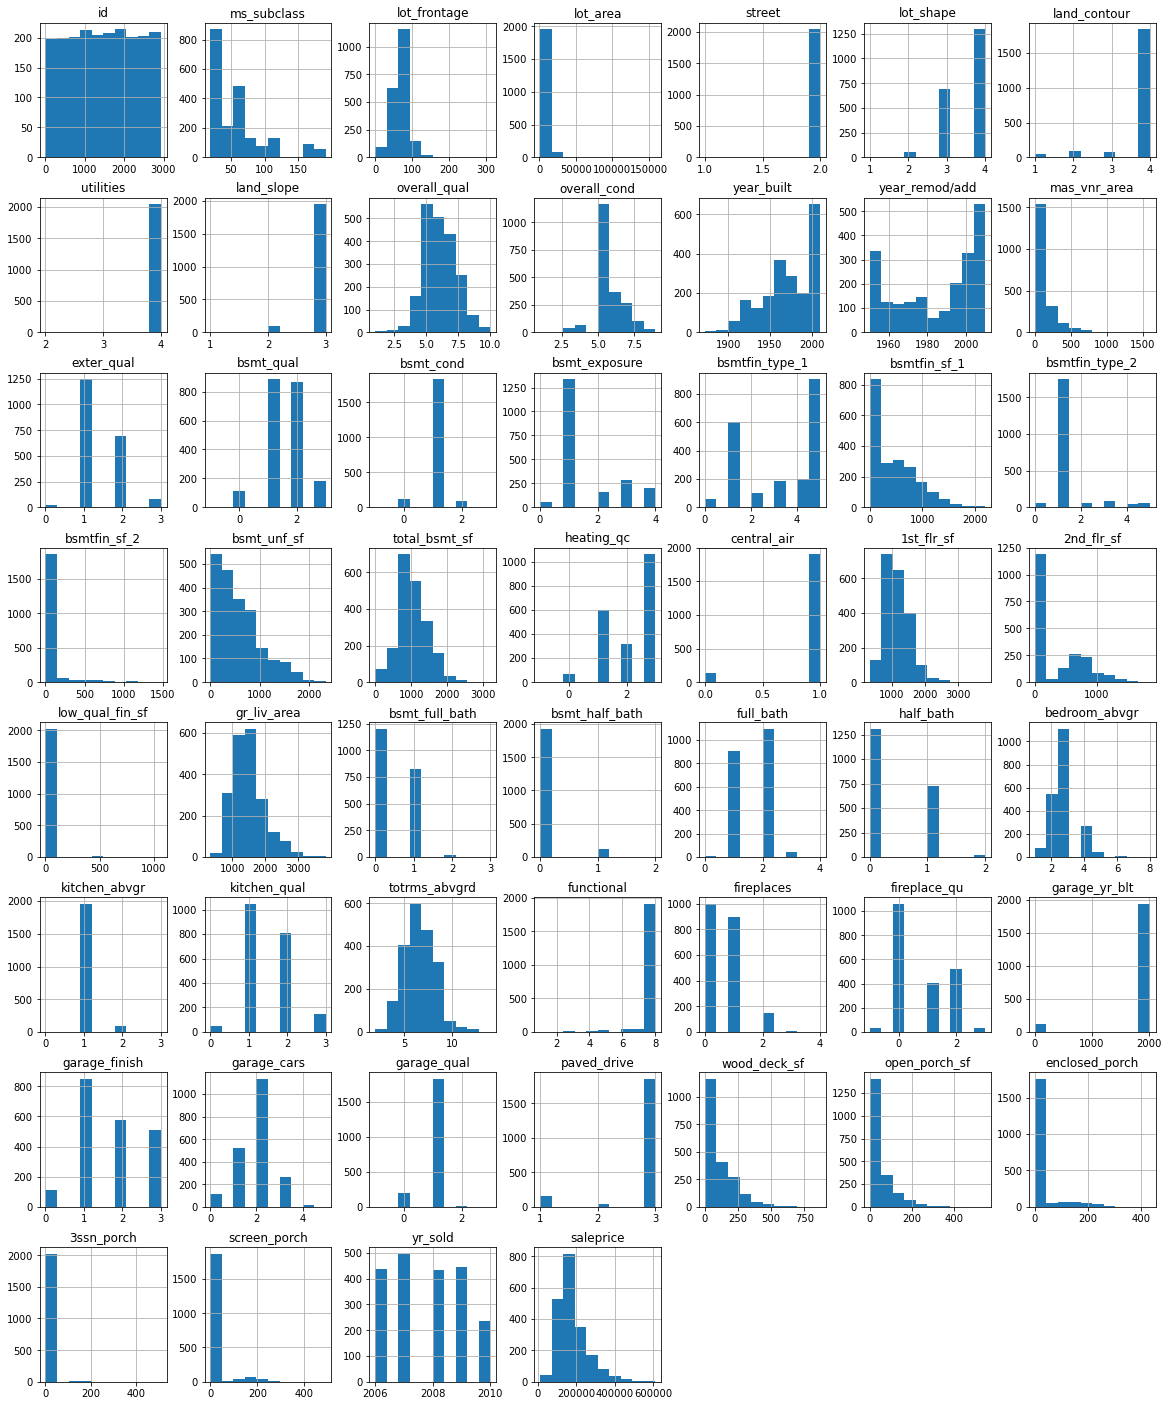

In [94]:
train.hist(figsize = (20, 25));


**Interpretationss**

No or few houses have: 
- low quality sf
- pools
- misc items
- basement half baths
- fences

Most houses have:
- land slope (most are at a 3: gentle slope)
- all utilities
- basements
- garages
- a porch or deck
- ac
- most are functional houses 
- exter condition (3_
- garage quality and condition: 3 and 3
- have a street that is paved
- either normal or near-normal lot shape
- good garage quality

These uneven distributions do not allow enough data to be good predictors of a home value and therefore will most likely not be included on the final modeling for renovation recommendations.

In [95]:
# is year sold worth including in the rest of the dataset?

train.groupby('yr_sold')['saleprice'].mean()

yr_sold
2006    179471.609589
2007    185527.883300
2008    181800.488479
2009    182455.244395
2010    174180.059829
Name: saleprice, dtype: float64

In [96]:
# making a list of features whose distributions or saleprice differences 
# are not useful for unregularized model which I will drop

drop_lst = []
drop_lst.extend(['enclosed_porch',
                '3ssn_porch',
                'screen_porch',
                'garage_yr_blt',
                'bsmt_half_bath',
                'functional',
               'low_qual_fin_sf',
                'garage_qual',
                'paved_drive', 
                'central_air',
                'bsmtfin_sf_2',
                'kitchen_abvgr',
               'utilities',
               'land_slope', 
               'lot_area',
               'street',
               'land_slope', 
                'yr_sold',
                'bsmtfin_type_2',
                 'bsmtfin_sf_2',
                'exterior_2nd']) 

In [97]:
len(drop_lst)

21

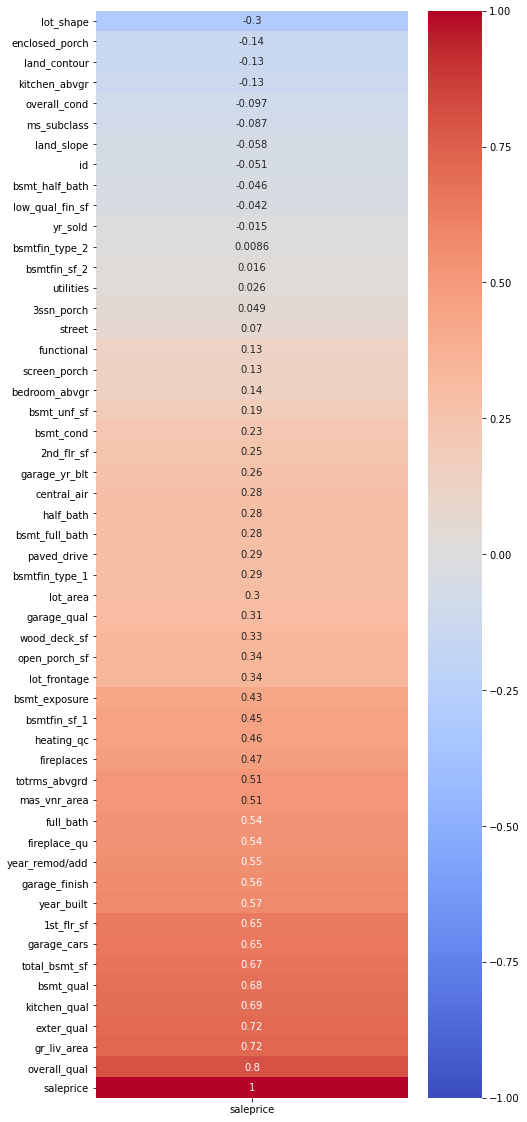

In [98]:
# Correlation of data to saleprice

plt.figure(figsize = (7, 20))
sns.heatmap(train.corr()['saleprice'].to_frame().sort_values('saleprice'), annot = True, 
            cmap = 'coolwarm', 
            vmin = -1,
            vmax = 1);

**Interpretation**

It seems as though the top scores are things within house size and quality:
- Overall quality
- Full above ground size
- Exterior quality
- Kitchen quality
- Basement size

In [99]:
train.dtypes[train.dtypes == 'object']


ms_zoning       object
lot_config      object
neighborhood    object
condition_1     object
condition_2     object
bldg_type       object
house_style     object
roof_style      object
roof_matl       object
exterior_1st    object
exterior_2nd    object
mas_vnr_type    object
foundation      object
heating         object
electrical      object
garage_type     object
mo_sold         object
sale_type       object
dtype: object

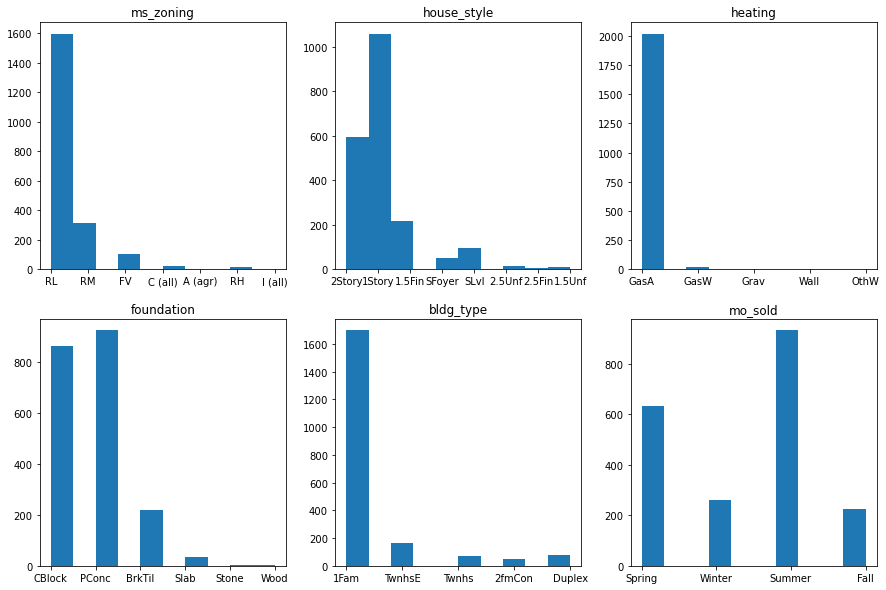

In [100]:
# Plotting categorical features' distributions

fig, ax = plt.subplots(2, 3, figsize = (15, 10))

ax[0,0].hist(train['ms_zoning'])
ax[0,0].set_title('ms_zoning')

ax[0,1].hist(train['house_style'])
ax[0,1].set_title('house_style')

ax[1,0].hist(train['foundation'])
ax[1,0].set_title('foundation')

ax[0,2].hist(train['heating'])
ax[0,2].set_title('heating')

ax[1,2].hist(train['mo_sold'])
ax[1,2].set_title('mo_sold')

ax[1,1].hist(train['bldg_type'])
ax[1,1].set_title('bldg_type');

In [101]:
# add heating to the drop list due to its uneven distribution

drop_lst.append('heating')
len(drop_lst)


22

Text(0.5, 1.0, 'Price by Season Sold')

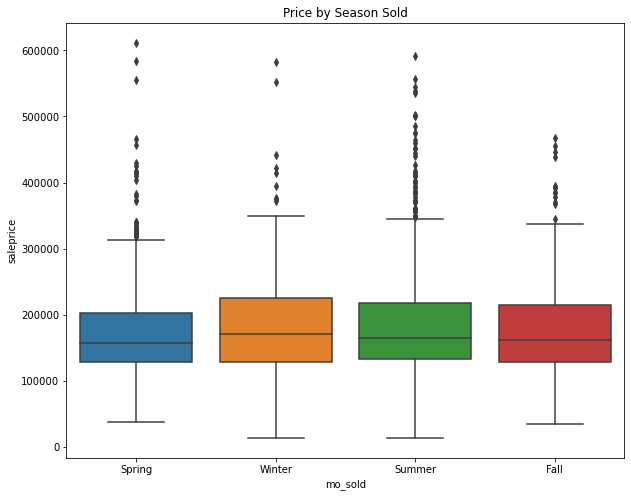

In [102]:
# boxplot of saleprice by season sold 

plt.figure(figsize = (10, 8))
sns.boxplot(x = train['mo_sold'], y = train['saleprice']).set_title('Price by Season Sold')

**Interpretation**

I thought there might be a busier season in which housing prices spike with demand, but it does not seem to be the case, therefore not useful for the model.

Text(0.5, 1.0, 'Price by House Style')

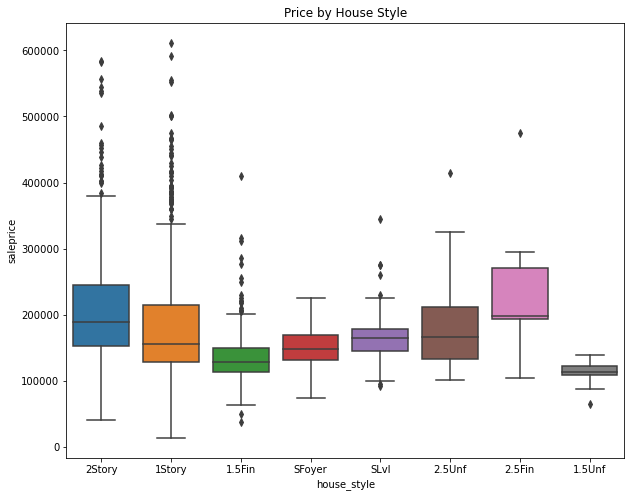

In [103]:
# boxplot of saleprice by house style

plt.figure(figsize = (10, 8))
sns.boxplot(x = train['house_style'], 
            y = train['saleprice']).set_title(
    'Price by House Style')

**Interpretation**

Because house styles seem to have a somewhat even distribution and a difference in prices as show in the above boxplot, it may be worth examining how the model does with this feature. 

Text(0.5, 1.0, 'Price by Subclass')

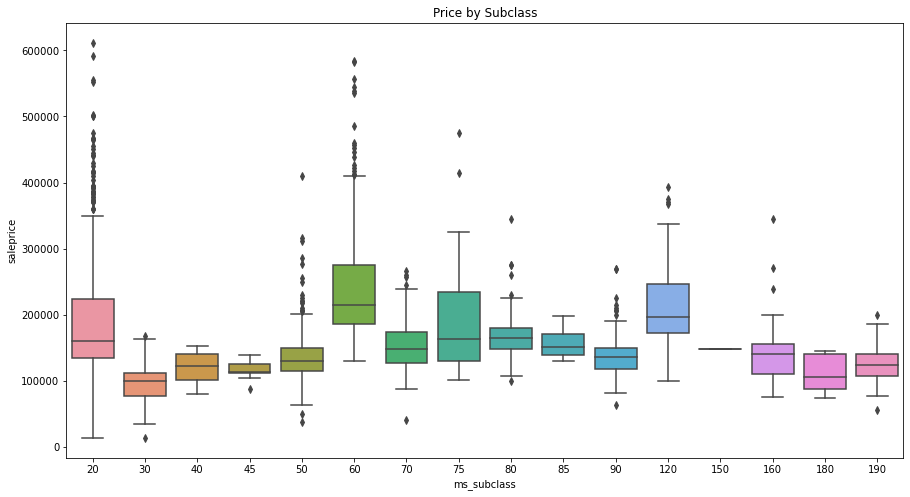

In [104]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = train['ms_subclass'], 
            y = train['saleprice']).set_title(
    'Price by Subclass')

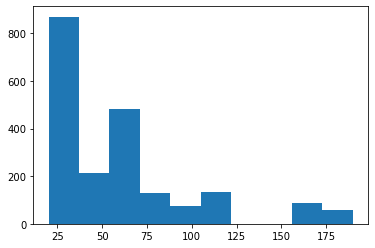

In [105]:
plt.hist(train['ms_subclass']);

**Interpretation**

We can see from subclass distribution and price that it may be useful to look into this feature for the model. 

In [106]:
train['ms_subclass'].value_counts()

20     769
60     393
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: ms_subclass, dtype: int64

Text(0.5, 1.0, 'Price by Zone')

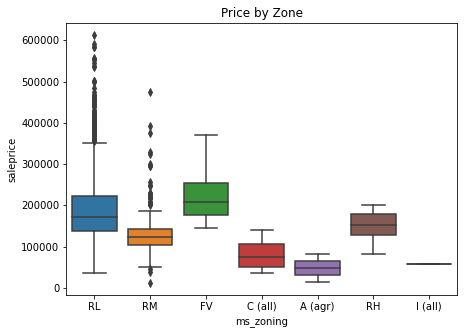

In [107]:
plt.figure(figsize = (7 ,5))
sns.boxplot(x = train['ms_zoning'], 
            y = train['saleprice']).set_title(
    'Price by Zone')

**Things to note**

- Most houses have forced warm air furnaces (GasA).
- Most houses are '1 family detached' homes.
- A majority of houses are in the 'Residential Low Density' Zoning Area.  

In [108]:
train.corr()['saleprice'].sort_values().head()

lot_shape        -0.296743
enclosed_porch   -0.135713
land_contour     -0.133356
kitchen_abvgr    -0.125472
overall_cond     -0.097093
Name: saleprice, dtype: float64

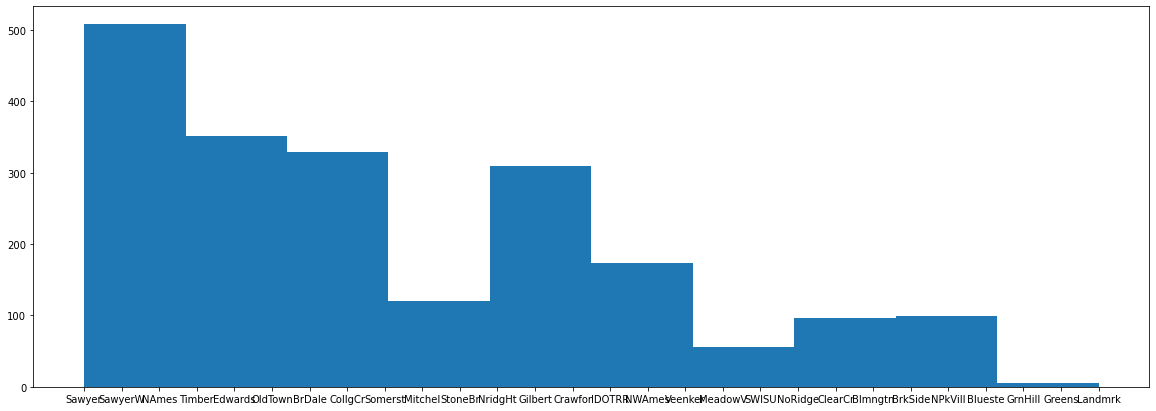

In [109]:
plt.figure(figsize = (20, 7))
plt.hist(train['neighborhood']);

Text(0.5, 1.0, 'Price by Neighborhood')

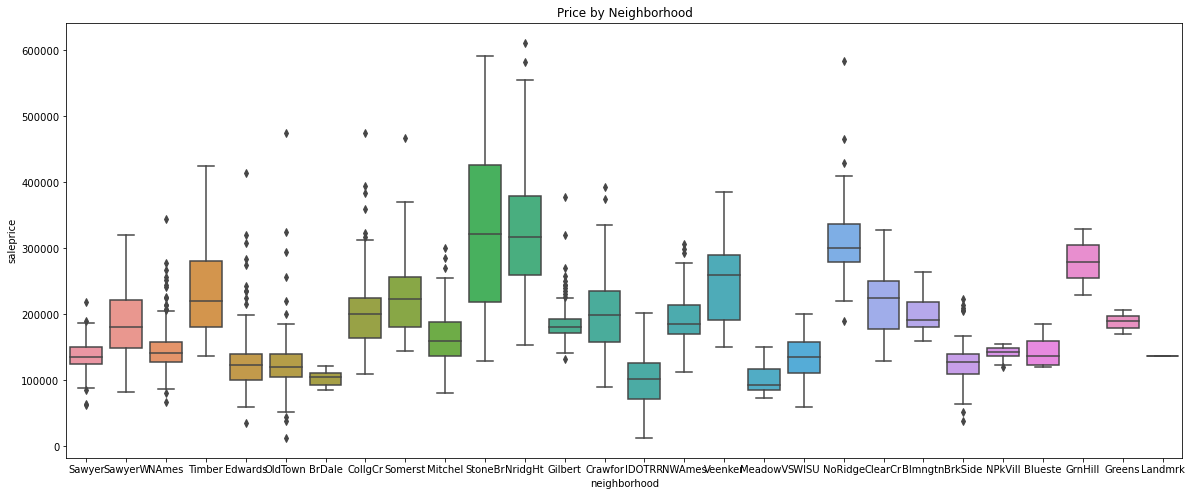

In [110]:
plt.figure(figsize = (20, 8))
sns.boxplot(x = train['neighborhood'],
            y = train['saleprice']).set_title(
    'Price by Neighborhood')

**Interpretation**

Neighborhood seems to be a good predictor due to its compressed boxplots and even distribution.

Text(0.5, 1.0, 'Price by Lot Configuration')

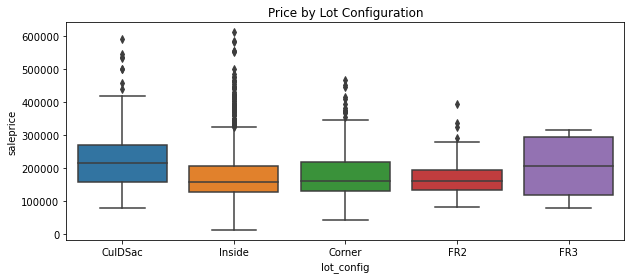

In [111]:
# Boxplot of lot configuration

plt.figure(figsize = (10, 4))
sns.boxplot(x = train['lot_config'], 
            y = train['saleprice']).set_title(
    'Price by Lot Configuration')

**Interpretation** 

Due to the overlap in prives for the middle quantiles, lot configuration is an adjacent predictor to the hosue prices, there may be related features that are more of predictors.

Text(0.5, 1.0, 'Price by Heating')

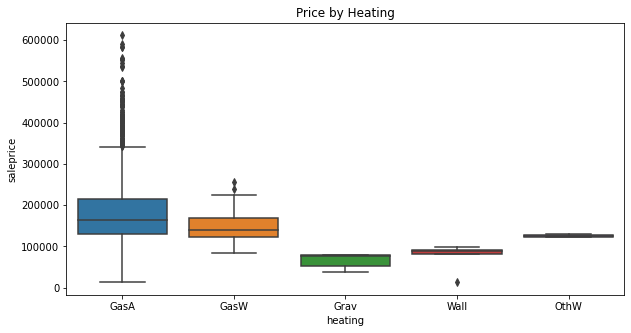

In [112]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = train['heating'], 
            y = train['saleprice']).set_title(
    'Price by Heating')

**Interpretation**

If you looked at the histogram of heating, almost every house has GasA: gas forced warm air furnace.

This explains the wide dispersion in prices in the boxplot above. 

Text(0.5, 1.0, 'Price by Electrical')

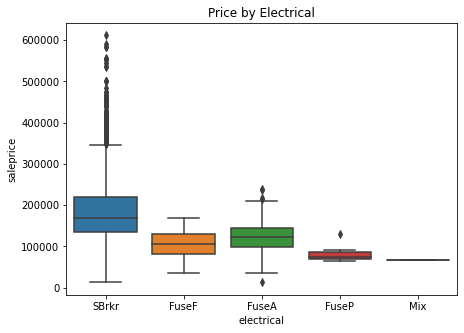

In [113]:
plt.figure(figsize = (7, 5))
sns.boxplot(x = train['electrical'],
            y = train['saleprice']).set_title(
    'Price by Electrical')

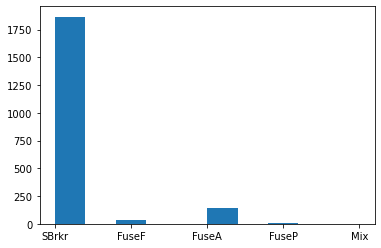

In [114]:
plt.hist(train['electrical']);

**Interpretation**

As with heating, most houses have 'Standard Circuit Breakers & Romex' so are not good predictors of the house value.

In [115]:
# adding electrical to the drop list

drop_lst.append('electrical')

Text(0.5, 1.0, 'Price by Condition')

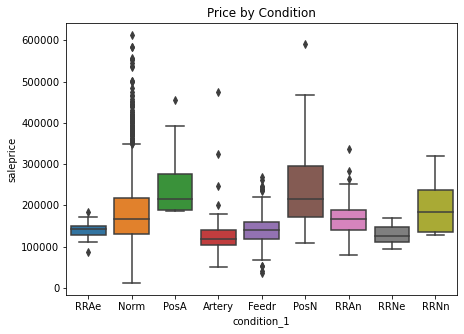

In [116]:
# Plotting sale price by condition 1

plt.figure(figsize = (7, 5))
sns.boxplot(x = train['condition_1'], 
            y = train['saleprice']).set_title(
    'Price by Condition')

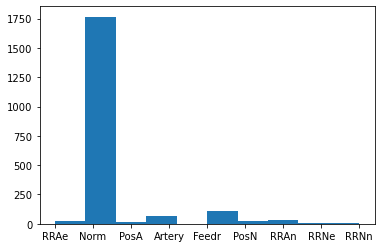

In [117]:
plt.hist(train['condition_1']);

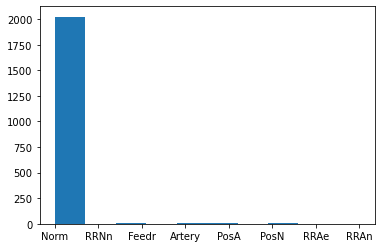

In [118]:
plt.hist(train['condition_2']);

**Interpretation of Condition 1 and 2**

There is so much overlap in the prices of the conditions, especially important because most houses have a Normal condition. It will not be a useful predictor.

In [119]:
# condition two is even more unevenly distributed.

drop_lst.extend(['condition_1', 'condition_2'])

In [120]:
train.groupby('overall_cond')['saleprice'].mean()

overall_cond
1     59625.000000
2     65364.833333
3     99786.000000
4    114034.571429
5    207116.247856
6    148952.665761
7    155327.270370
8    155913.366337
9    198177.586207
Name: saleprice, dtype: float64

In [121]:
train[['overall_cond', 'saleprice']].corr()[['overall_cond', 'saleprice']]

,overall_cond,saleprice
overall_cond,1.000000,-0.097093
saleprice,-0.097093,1.000000


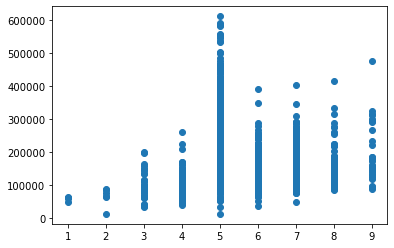

In [122]:
plt.scatter(x = train['overall_cond'], y = train['saleprice'])

**Interpretation**

You can see that the price of a house based on its overall condition is not a good feature to use to assess a houses price. It would be recommended to renovators to not waste money making the entire house high quality, but ensure that the quality is at 5, or Average, and focus money elsewhere. 

In [123]:
train.dtypes[train.dtypes != 'object']

id                   int64
ms_subclass          int64
lot_frontage       float64
lot_area             int64
street               int64
lot_shape            int64
land_contour         int64
utilities            int64
land_slope           int64
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
mas_vnr_area       float64
exter_qual           int64
bsmt_qual            int64
bsmt_cond            int64
bsmt_exposure        int64
bsmtfin_type_1       int64
bsmtfin_sf_1       float64
bsmtfin_type_2       int64
bsmtfin_sf_2       float64
bsmt_unf_sf        float64
total_bsmt_sf      float64
heating_qc           int64
central_air          int64
1st_flr_sf           int64
2nd_flr_sf           int64
low_qual_fin_sf      int64
gr_liv_area          int64
bsmt_full_bath     float64
bsmt_half_bath     float64
full_bath            int64
half_bath            int64
bedroom_abvgr      float64
kitchen_abvgr        int64
kitchen_qual         int64
t

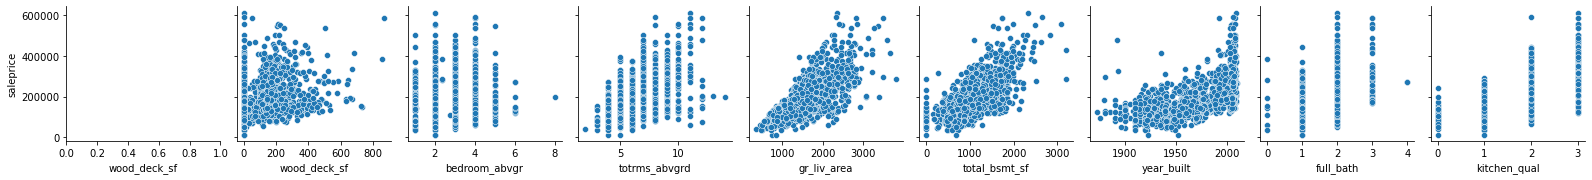

In [124]:
# plotting scatter plots of important continuous variables

sns.pairplot(train, y_vars=['saleprice'], x_vars=
                                               ['wood_deck_sf',
                                                  'wood_deck_sf',
                                                  'bedroom_abvgr', 
                                               'totrms_abvgrd',
                                               'gr_liv_area',
                                               'total_bsmt_sf',
                                               'year_built', 
                                                 'full_bath',
                                                 'kitchen_qual'])

**Interpretation**
I can see that most of the features except for bedrooms above ground have some correlation to the price. 

# Feature Engineering and New Columns

In [125]:
train['total_baths'] = train[
    'full_bath'] + train[
    'bsmt_full_bath'] + train[
    'bsmt_half_bath'] + train[
    'half_bath']

train['bsmt_finished'] = ((train['total_bsmt_sf'] - train['bsmt_unf_sf']))

In [126]:
train['bsmt_finished'].describe()

count    2049.000000
mean      485.787213
std       462.037967
min         0.000000
25%         0.000000
50%       454.000000
75%       792.000000
max      2461.000000
Name: bsmt_finished, dtype: float64

In [127]:
train['size_n_qual'] = train['gr_liv_area'] * train['overall_qual']

In [128]:
train['bed_n_bath'] = train['total_baths'] * train['bedroom_abvgr']

In [129]:
train['fin_bsmt_fin_qual'] = train['bsmt_finished'] * train['bsmtfin_type_1']

In [130]:
train['bsmt_fin_n_ceiling'] = train['bsmt_finished'] * train['bsmt_qual']
train['bsmt_finished_with_bath'] = train['bsmt_finished'] * train['bsmt_full_bath']
train['bsmt_finished_with_halfbath'] = train['bsmt_finished'] * train['bsmt_half_bath']
train['bsmt_size_fin_sf'] = train['bsmt_finished'] * train['total_bsmt_sf']

In [131]:
train['overall_qual_cond'] = train['overall_qual'] * train['overall_cond']

# Choosing Columns

In [132]:
train.corr()['saleprice'].sort_values()

lot_shape        -0.296743
enclosed_porch   -0.135713
land_contour     -0.133356
kitchen_abvgr    -0.125472
overall_cond     -0.097093
                    ...   
exter_qual        0.715048
gr_liv_area       0.719463
overall_qual      0.803462
size_n_qual       0.872971
saleprice         1.000000
Name: saleprice, Length: 63, dtype: float64

In [133]:
train.dtypes[train.dtypes == 'object']

ms_zoning       object
lot_config      object
neighborhood    object
condition_1     object
condition_2     object
bldg_type       object
house_style     object
roof_style      object
roof_matl       object
exterior_1st    object
exterior_2nd    object
mas_vnr_type    object
foundation      object
heating         object
electrical      object
garage_type     object
mo_sold         object
sale_type       object
dtype: object

# Saving Cleaned Train DF to CSV

In [134]:
train.to_csv(r'./datasets/cleaned_train.csv', index = False)

From this point on, we will do model fitting and feature selection in
- Lasso Predictions - Best Model
- LR - Renovations Not Scaled
- LR Best Features Not Scaled